In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
dfE=pd.read_csv('Walmart_Sales.csv')

In [ ]:
df=dfE.copy()

In [ ]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.tail(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.shape#gozlem sayisi

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.dtypes

,0
Store,int64
Date,object
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [ ]:
df.columns#degisken isimleri

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [ ]:
# 'Date' sütununu datetime formatına çevir
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 1 Eylül'den sonrasını hariç tutarak veriyi filtrele
df = df[(df['Date'].dt.month != 9) | (df['Date'].dt.day <= 1)]





In [ ]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Benzersiz mağazaları kontrol et
print(df['Store'].unique())


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [ ]:
df['Date'].max()


Timestamp('2012-10-26 00:00:00')

In [ ]:
# Mağaza bazında veriyi grupla ve sayısal sütunların ortalamalarını al
storemean = df.groupby(by="Store").mean(numeric_only=True)

# İlk 5 mağazanın ortalamalarını görüntüle
storemean.head(5)


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,1.562085e+06,0.053846,67.236769,3.213908,215.921840,7.613077
2,1.940481e+06,0.053846,67.045615,3.213908,215.571297,7.633031
3,4.051276e+05,0.053846,70.461538,3.213908,219.316107,7.182723
4,2.103335e+06,0.053846,61.304231,3.210523,128.657136,5.991808
5,3.192550e+05,0.053846,68.280077,3.213908,216.490467,6.301554


In [ ]:
# Her mağazanın en yüksek satışını görmek
storemax = df.groupby(by="Store")['Weekly_Sales'].max()

# Her mağazanın en düşük satışını görmek
storemin = df.groupby(by="Store")['Weekly_Sales'].min()

# En yüksek ve en düşük satışları yazdırmak
print(storemax.head(5))
print(storemin.head(5))


Store
1    2387950.20
2    3436007.68
3     605990.41
4    3676388.98
5     507900.07
Name: Weekly_Sales, dtype: float64
Store
1    1316899.31
2    1660906.14
3     339597.38
4    1762539.30
5     260636.71
Name: Weekly_Sales, dtype: float64


<ipython-input-31-7f0d9a7dd5b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Store "+storemean.index.astype('str'), y=storemean['Weekly_Sales'], palette='viridis')


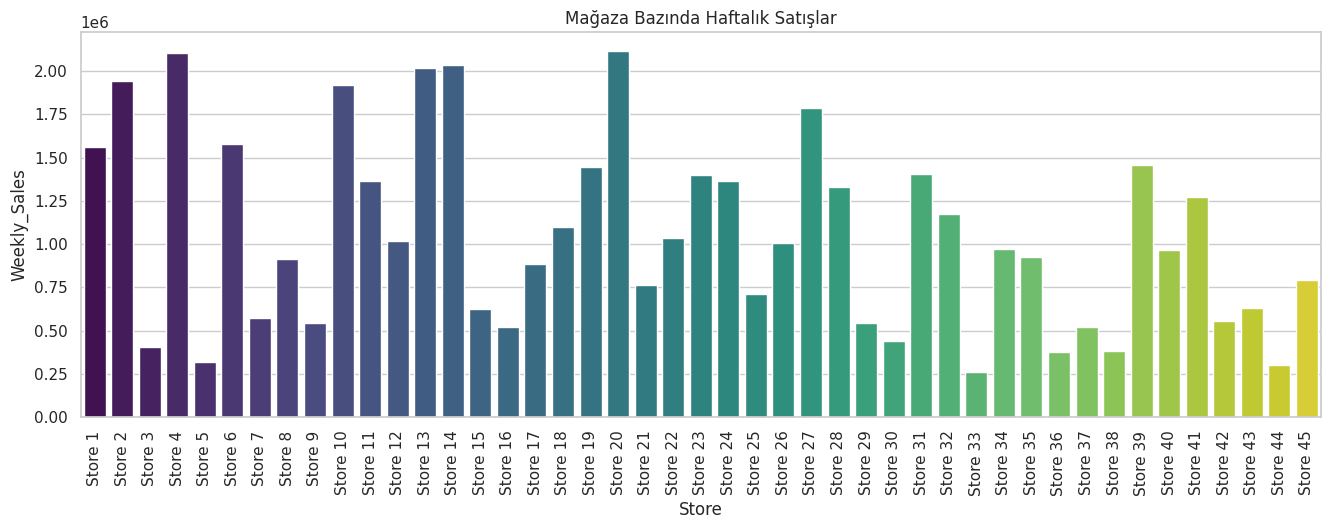

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,5))
sns.barplot(x="Store "+storemean.index.astype('str'), y=storemean['Weekly_Sales'], palette='viridis')
plt.xticks(rotation=90)
plt.title("Mağaza Bazında Haftalık Satışlar")
plt.show()



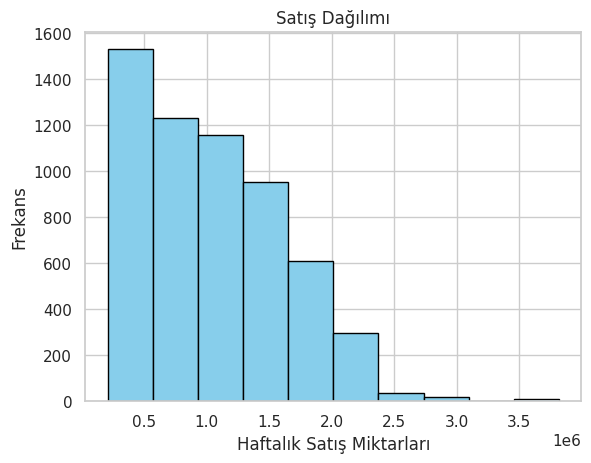

In [ ]:
plt.hist(df['Weekly_Sales'], bins=10, color='skyblue', edgecolor='black')
plt.title('Satış Dağılımı')
plt.xlabel('Haftalık Satış Miktarları')
plt.ylabel('Frekans')
plt.show()

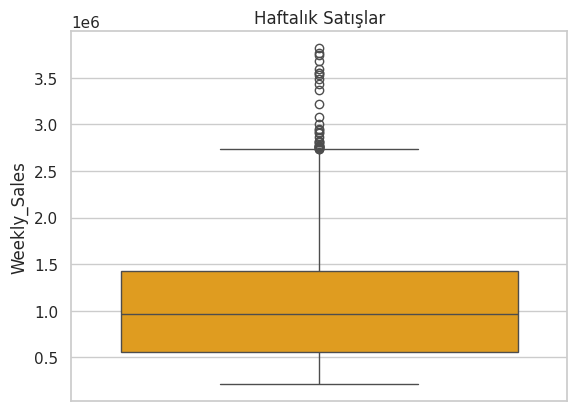

In [ ]:
sns.boxplot(y=df['Weekly_Sales'], color='orange')
plt.title('Haftalık Satışlar')
plt.show()


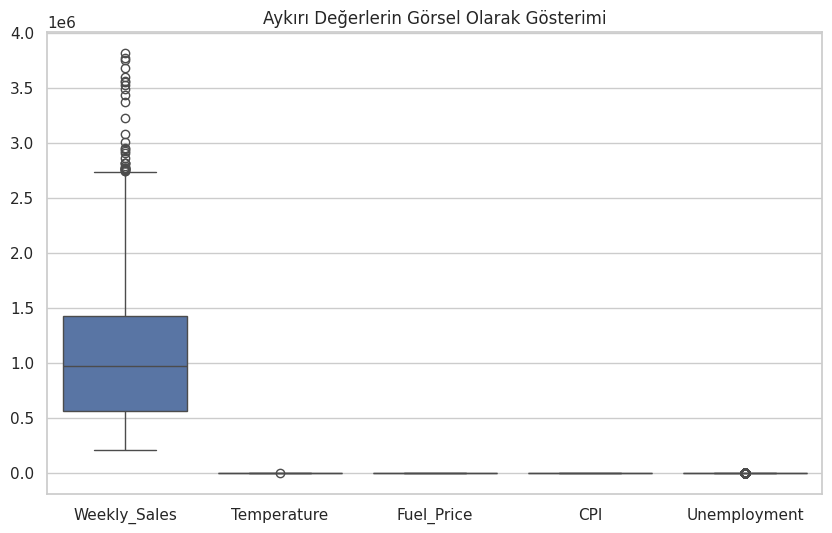

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.title('Aykırı Değerlerin Görsel Olarak Gösterimi')
plt.show()

<ipython-input-35-1b4599ab4725>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette='pastel')


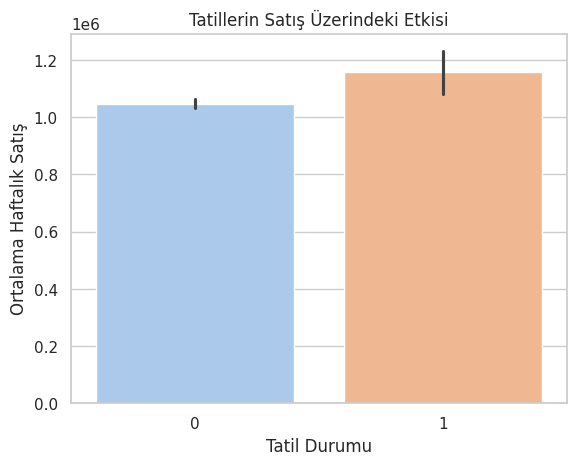

In [ ]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette='pastel')
plt.title('Tatillerin Satış Üzerindeki Etkisi')
plt.xlabel('Tatil Durumu')
plt.ylabel('Ortalama Haftalık Satış')
plt.show()


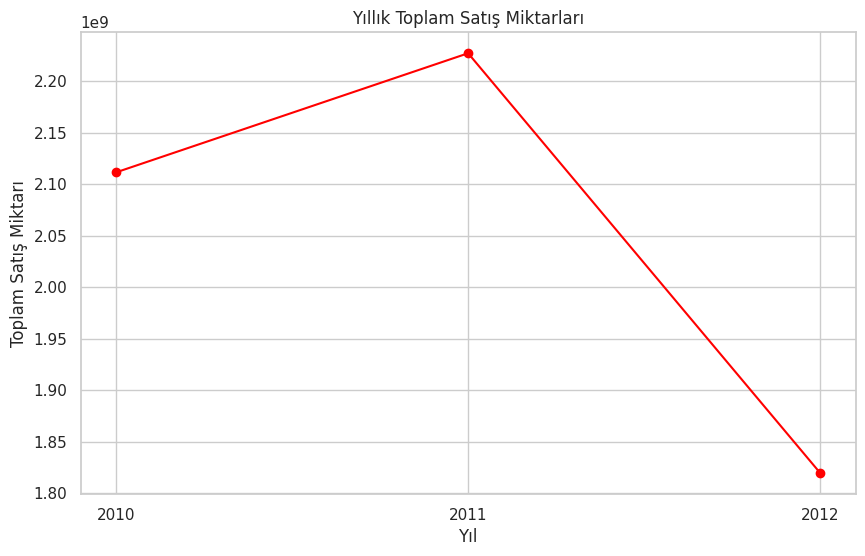

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 'Date' sütunundan yıl bilgisini ayrı bir sütuna almak
df['Year'] = df['Date'].dt.year

# Veriyi yıla göre gruplandırıp, her yılın 'Weekly_Sales' sütununu toplamak
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum()

# Veriyi görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, color='red', linestyle='-', marker='o')
plt.title("Yıllık Toplam Satış Miktarları")
plt.xlabel("Yıl")
plt.ylabel("Toplam Satış Miktarı")
plt.xticks(yearly_sales.index.astype(int))  # x ekseninde sadece yıl değerlerini göstermek için
plt.grid(True)
plt.show()


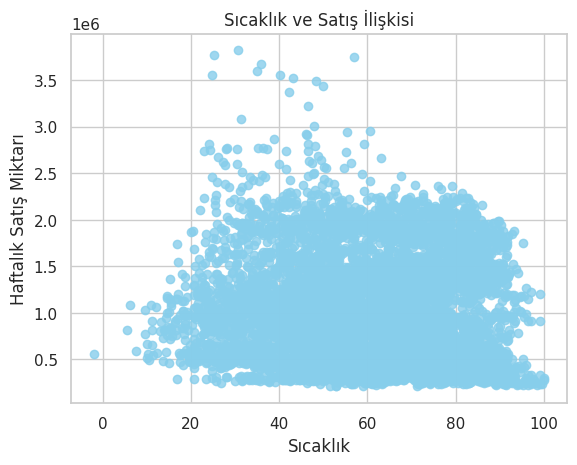

In [ ]:
plt.scatter(df['Temperature'], df['Weekly_Sales'], color='skyblue', alpha=0.8)
plt.title('Sıcaklık ve Satış İlişkisi')
plt.xlabel('Sıcaklık')
plt.ylabel('Haftalık Satış Miktarı')
plt.show()


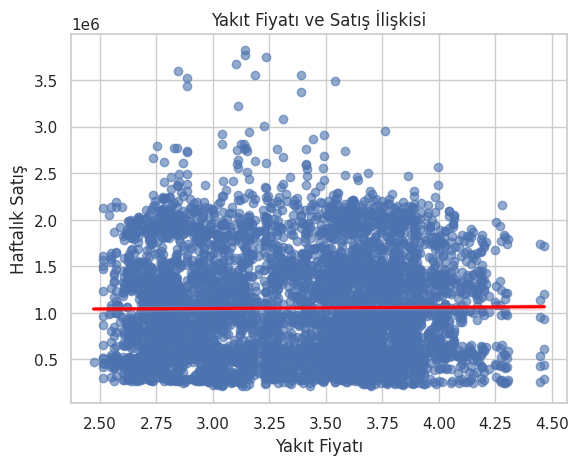

In [ ]:
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=df, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title('Yakıt Fiyatı ve Satış İlişkisi')
plt.xlabel('Yakıt Fiyatı')
plt.ylabel('Haftalık Satış')
plt.show()


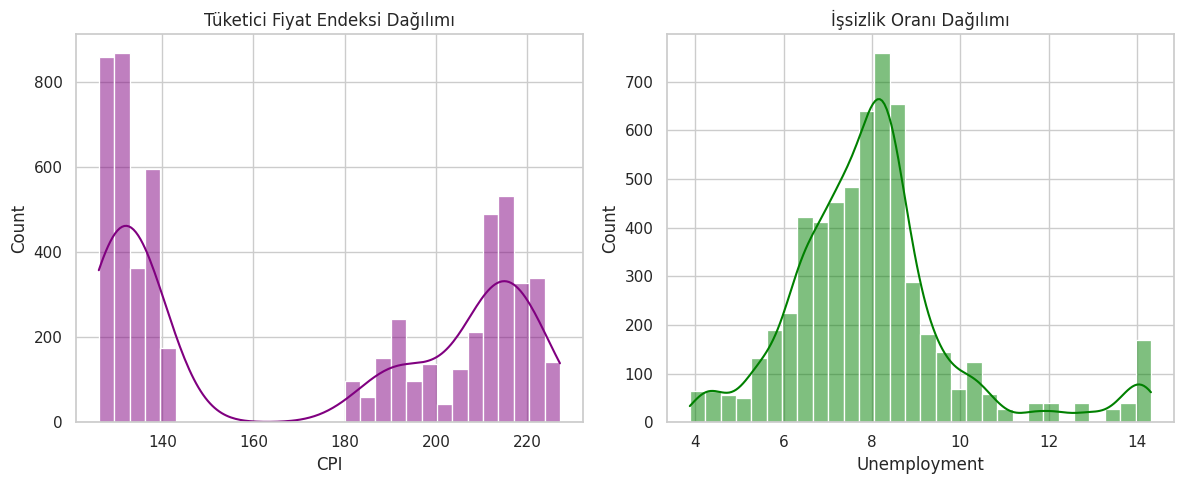

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['CPI'], bins=30, kde=True, ax=axes[0], color='purple')
axes[0].set_title('Tüketici Fiyat Endeksi Dağılımı')

sns.histplot(df['Unemployment'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('İşsizlik Oranı Dağılımı')

plt.tight_layout()
plt.show()




In [ ]:
correlation = df.corr()  #  korelasyon hesaplama


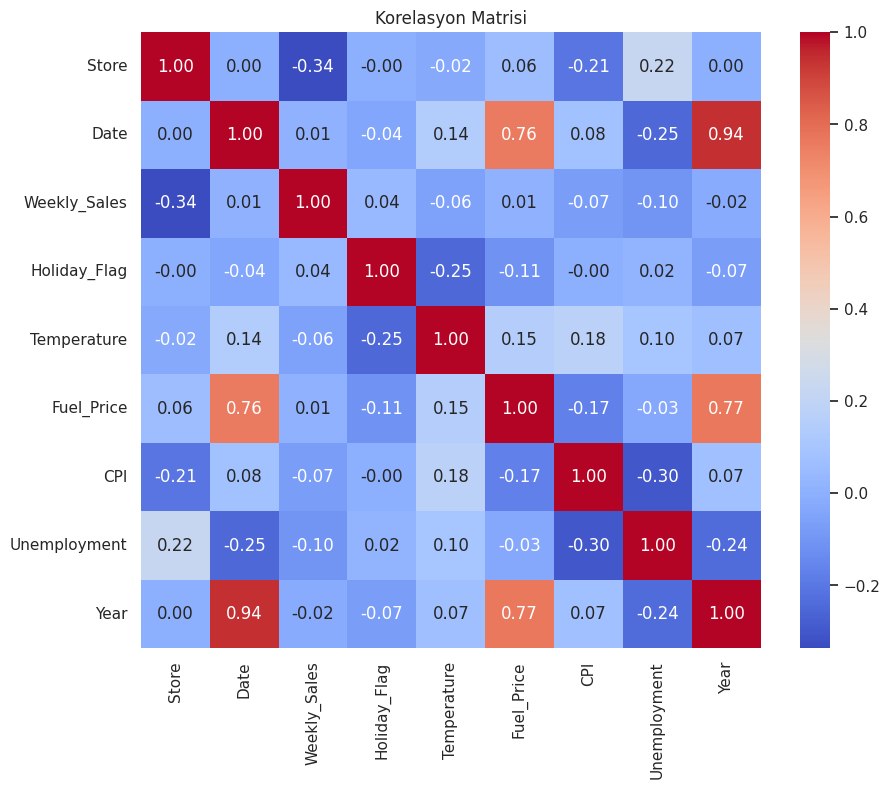

In [ ]:
# Korelasyon matrisi
corr_matrix = df.corr()

# Isı haritası
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Korelasyon Matrisi")
plt.show()

In [ ]:
# Gereksiz sütunları düşür ve hedef değişkeni ve özellikleri ayır
y = df['Weekly_Sales']
x = df.drop(columns=["Date", "Weekly_Sales"])




In [ ]:
# Veriyi eğitim ve test setlerine ayır
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=42)


In [ ]:
standart = StandardScaler()

In [ ]:
x_train_scaler = standart.fit_transform(x_train)

In [ ]:
x_test_scaler = standart.transform(x_test)

In [ ]:
# Model oluştur, eğit ve skor
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
r2 = rf_model.score(x_test, y_test)
y_pred_rf = rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest R^2: {r2:.3f}")
print(f"Random Forest MSE: {mse_rf:.3f}")
print(f"Random Forest MAE: {mae_rf:.3f}")


Random Forest R^2: 0.930
Random Forest MSE: 22381873303.182
Random Forest MAE: 78904.208


In [ ]:
from xgboost import XGBRegressor
xgb =XGBRegressor()
xgb_model = xgb.fit(x_train, y_train)
xgb = xgb_model.score(x_test, y_test)
y_pred_xgb = xgb_model.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2 = xgb_model.score(x_test, y_test)

print(f"xgboost R^2: {r2:.3f}")
print(f"xgboost MSE: {mse_xgb:.3f}")
print(f"xgboost  MAE: {mae_xgb:.3f}")


xgboost R^2: 0.946
xgboost MSE: 17129620961.679
xgboost  MAE: 72489.116


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(n_estimators=100)
et_model=et.fit(x_train, y_train)
y_pred_et= et_model.predict(x_test)
mse_et = mean_squared_error(y_test, y_pred_et)
mae_et = mean_absolute_error(y_test, y_pred_et)
r2 = et_model.score(x_test, y_test)

print(f"et R^2: {r2:.3f}")
print(f"et  MSE: {mse_et:.3f}")
print(f"et  MAE: {mae_et:.3f}")


knn R^2: 0.937
knn  MSE: 20276276838.518
knn  MAE: 76884.621


In [ ]:
en_fazla_satis = df.groupby('Store')['Weekly_Sales'].sum().idxmax()
print(f"En fazla satış yapan mağaza: {en_fazla_satis}")


En fazla satış yapan mağaza: 20


In [ ]:
en_az_satis = df.groupby('Store')['Weekly_Sales'].sum().idxmin()
print(f"En az satış yapan mağaza: {en_az_satis}")


En az satış yapan mağaza: 33


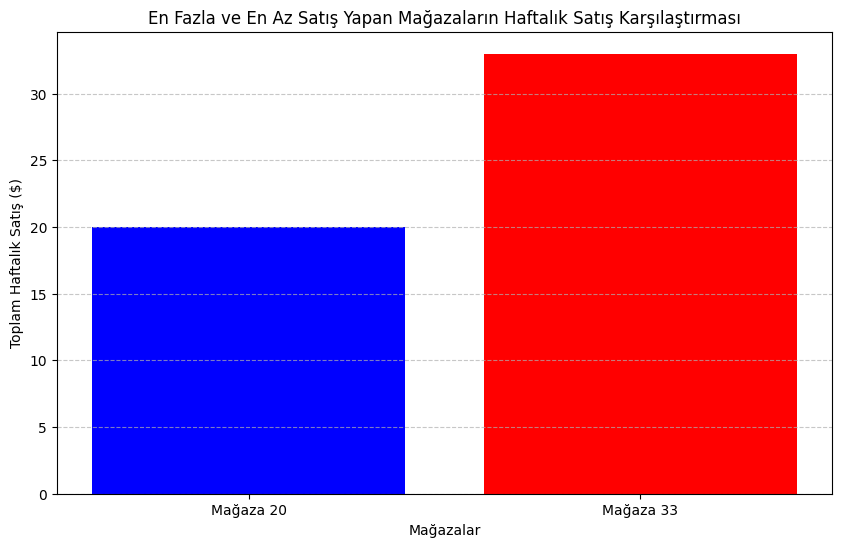

In [ ]:
stores = ['Mağaza 20', 'Mağaza 33']
sales = [en_fazla_satis.sum(), en_az_satis.sum()]

# Bar grafiği çizilir
plt.figure(figsize=(10, 6))
plt.bar(stores, sales, color=['blue', 'red'])
plt.title('En Fazla ve En Az Satış Yapan Mağazaların Haftalık Satış Karşılaştırması')
plt.xlabel('Mağazalar')
plt.ylabel('Toplam Haftalık Satış ($)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-42-7ae0428e9da2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store33['Rolling_Avg'] = store33['Weekly_Sales'].rolling(window=4).mean()


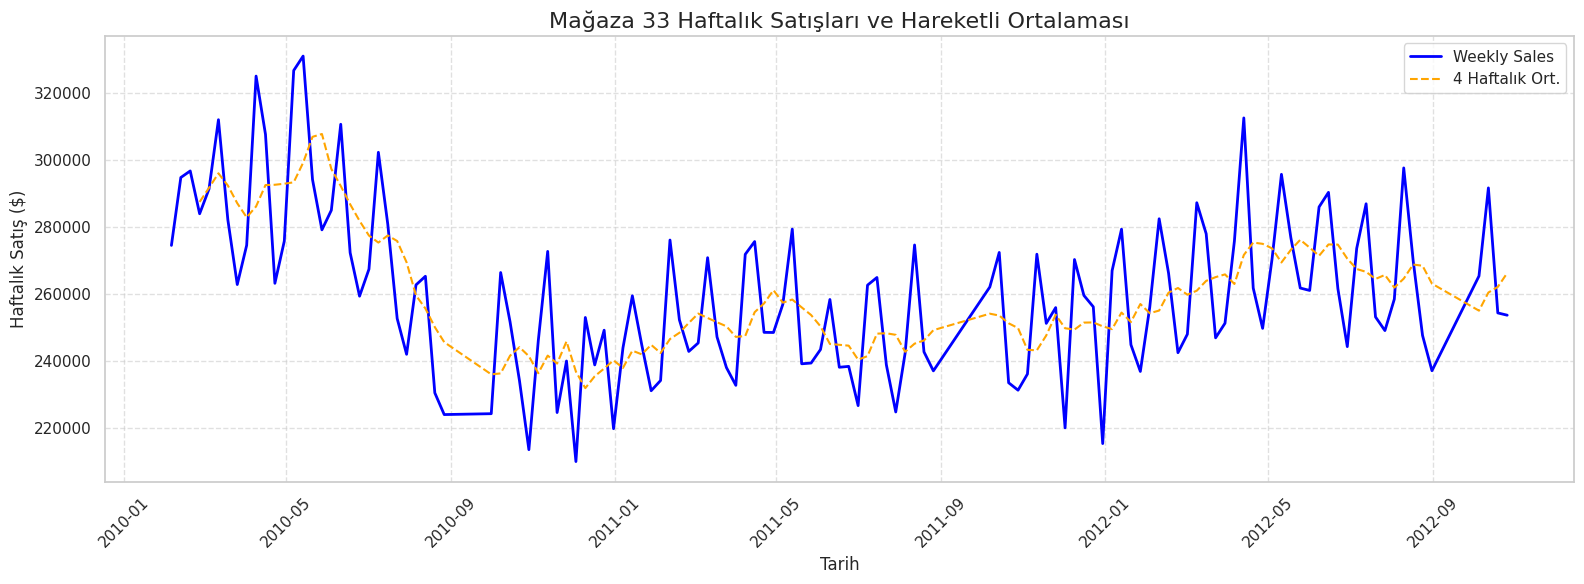

In [ ]:
store33= df[df['Store'] == 33]
store33['Rolling_Avg'] = store33['Weekly_Sales'].rolling(window=4).mean()

plt.figure(figsize=(16, 6))
plt.plot(store33['Date'], store33['Weekly_Sales'], label='Weekly Sales', color='blue', linewidth=2)
plt.plot(store33['Date'], store33['Rolling_Avg'], label='4 Haftalık Ort.', color='orange', linestyle='--')
plt.title("Mağaza 33 Haftalık Satışları ve Hareketli Ortalaması", fontsize=16)
plt.xlabel("Tarih", fontsize=12)
plt.ylabel("Haftalık Satış ($)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
